In [32]:
import streamlit as st
import dropbox
import os
os.chdir('../')
import data_manager
import xarray as xr
import pandas as pd

In [30]:
example_dict = {"last_clicked": {"lat":47.301584511330795,"lng":-120.12725830078126},
                "last_object_clicked": {"lat":47.301584511330795,"lng":-120.12725830078126},
                "last_object_clicked_tooltip":"\n        name\n\n        Upper Wheeler\n    \n        id\n\n        841:WA:SNTL\n    ",
                "last_object_clicked_popup":"\n        name\n\n        Upper Wheeler\n    \n        id\n\n        841:WA:SNTL\n    ",
                "all_drawings":[],
                "last_active_drawing":{"bbox":[-124.733174,45.543541,-116.915989,49.002357],
                                        "geometry":{"type":"MultiPolygon",
                                                    "coordinates":[[[[-122.397349,47.912401],[-122.419274,47.912125],[-122.431035,47.914732]]]]},
                                        "id":"0",
                                        # "properties":{},
                                        "type":"Feature"},
                "bounds":{"_southWest":{"lat":46.63057868059483,"lng":-121.36596679687501},
                          "_northEast":{"lat":47.934746769467786,"lng":-119.37469482421876}},
                "zoom":9,
                "last_circle_radius":"null",
                "last_circle_polygon":"null",
                "center":{"lat":47.286681888764214,"lng":-120.37033081054689},
                "selected_layers":[]}

if not 'properties' in example_dict['last_active_drawing'].keys():
    print("No Snotel site clicked")
elif example_dict['last_active_drawing']['properties'] == {}:
   print("No Snotel site clicked")

No Snotel site clicked


In [2]:
def test_db_connection():
    site = "Paradise"
    db_xr_file = f"/Apps/push-and-pull-pysumma/output/_{site}_timestep.nc"  # Path to the xarray file in Dropbox
    db_pd_file = f"/Apps/push-and-pull-pysumma/snotel_csvs/{site}.csv" # Path to csv in Dropbox
    # Test if the returned value from this function is an xarray dataset
    try:
        assert isinstance(data_manager.load_xarray_file_from_dropbox(dropbox_file_path=db_xr_file),
                                                          xr.Dataset)
        print("Test passed for xarray!")
    except:
        TypeError("Model output dataset was not loaded correctly.")
    try:
         assert isinstance(data_manager.load_pandas_df_from_dropbox(dropbox_file_path=db_pd_file),
                                                          pd.DataFrame)
         print("Test passed for pandas!")
    except:
        TypeError("SNOTEL dataset was not loaded correctly.")                                               


In [3]:
test_db_connection()

Test passed for xarray!
Test passed for pandas!


In [2]:
site = "Paradise"
db_xr_file = f"/Apps/push-and-pull-pysumma/output/_{site}_timestep.nc"  # Path to the xarray file in Dropbox
db_pd_file = f"/Apps/push-and-pull-pysumma/snotel_csvs/{site}.csv" # Path to csv in Dropbox
snotel_df = data_manager.load_pandas_df_from_dropbox(dropbox_file_path=db_pd_file)
summa_ds = data_manager.load_xarray_file_from_dropbox(dropbox_file_path=db_xr_file)

In [3]:
# produce a figure
import plotting
import matplotlib.pyplot as plt

In [4]:
%matplotlib inline

/home/dlhogan/courses/cse583/MoSnoPro-US/mosnopro_us/plotting.py:230: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
/home/dlhogan/miniconda3/envs/project_env/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/home/dlhogan/miniconda3/envs/project_env/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


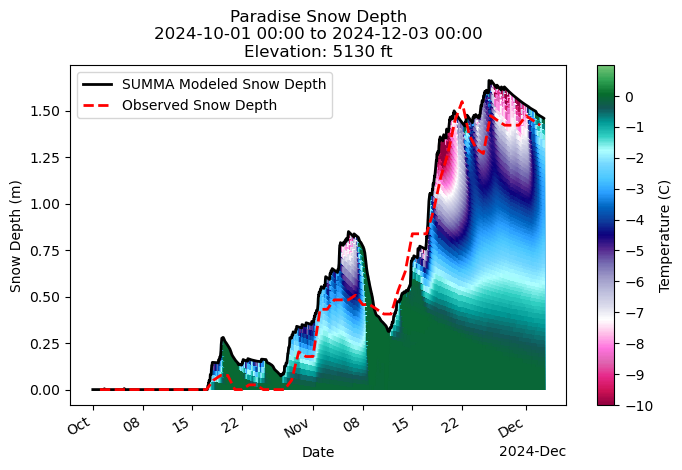

In [5]:
fig = plotting.produce_temp_depth_fig(summa_ds, snotel_df, site)

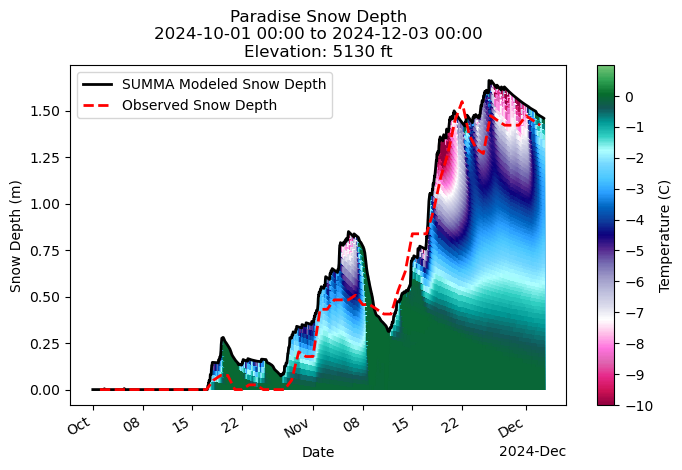

In [6]:
fig